# ***PROJET RAKUTEN***  

## **1) Description du projet**  
**Description du problème**    

L'objectif de ce défi est la classification à grande échelle des données de produits multimodales (textes et images) en type de produits.  
Par exemple, dans le catalogue de Rakuten France, **un produit** avec une désignation "Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style" **est associé à une image** (image_938777978_product_201115110.jpg) **et
à une description supplémentaire.** Ce produit est catégorisé sous **le code** produit 50.

## **2) Introduction**   

**description des fichiers**

le but du projet est de prédire le code de chaque produit tel que défini dans le catalogue de Rakuten France.  
La catégorisation des annonces de produits se fait par le biais de la désignation, de la description (quand elle est présente) et des images.  
Les fichiers de données sont distribués ainsi :  
***X_train_update.csv*** : fichier d'entrée d'entraînement  
***Y_train_CVw08PX.csv*** : fichier de sortie d'entraînement  
***X_test_update.csv*** : fichier d'entrée de test  
Un fichier images.zip est également fourni, contenant toutes les images.  
La décompression de ce fichier fournira un dossier nommé "images" avec deux sous-dossiers nommés ***"image_train"*** et ***"image_test"***, contenant respectivement les images d'entraînement et de test.  
Pour notre part, ne participant pas au challenge Rakuten, je n'ai pas pas accès au fichier de sortie de test.  
Le fichier d’entrée de test est donc inutilisable.  
**X_train_update.csv** : fichier d'entrée d'entraînement :  
La première ligne des fichiers d'entrée contient l'en-tête et les colonnes sont séparées par des virgules (",").  
Les colonnes sont les suivantes :  


*   **Un identifiant entier pour le produit**. Cet identifiant est utilisé pour associer le produit à son code de produit correspondant.
*   **Désignation** - Le titre du produit, un court texte résumant le produit
*   **Description** - Un texte plus détaillé décrivant le produit. Tous les marchands n'utilisent pas ce champ, il se peut donc que le champ de description contienne la valeur NaN pour de nombreux produits, afin de conserver l'originalité des données.
*   **productid** - Un identifiant unique pour le produit.
*   **imageid** - Un identifiant unique pour l'image associée au produit.
Les champs imageid et productid sont utilisés pour récupérer les images dans le dossier
d'images correspondant. Pour un produit donné, le nom du fichier image est :
image_imageid_product_productid.jpg ex : **image_1263597046_product_3804725264.jpg**  

**Y_train_CVw08PX.csv** : fichier de sortie d'entraînement :  
La première ligne des fichiers d'entrée contient l'en-tête et les colonnes sont séparées par des virgules (",").  
Les colonnes sont les suivantes :  
*  **Un identifiant entier pour le produit**. Cet identifiant est utilisé pour associer le produit à son
code de produit correspondant.
*  **prdtypecode** – Catégorie dans laquelle le produit est classé.

La liaison entre les fichiers se fait par une jointure sur l’identifiant entier présent sur les deux
fichiers.

## **3) Objectif de ce Notebook**  
Ce notebook fait partie d'un ensemble de sous-projets dont le resultat représente le **projet Rakuten** que j'ai réalisé pour mon diplôme de data Scientist chez Datascientest.com.  

Ce repositery est la partie **Réseaux convolutifs** et ne traite que de la partie image.  
Il fait suite aux parties **Machine Learning**  et **Réseaux de Neurones Récurrents**  .
Il utilise la bibliothèque **Bibli_DataScience** commune à l'ensemble du projet et la bibbliothèque **CNN_DataScience.py** propre à cette partie.  
Un dernier dépot viendra, à savoir  une syntèse par le media Streamlit.


Ce notebook traite de Traitement de reseaux à convolution (**Convolutional Neural Networks**, ou **CNN**) et teste plusieurs approches.
Les réseaux convolutifs ont révolutionné le domaine de la vision par ordinateur en permettant des avancées significatives dans des tâches variées telles que la classification d'images, la détection d'objets, la segmentation d'images et bien plus encore.

Ce projet explore l'utilisation des CNN pour résoudre différents problèmes de traitement d'images en utilisant le transfert d'apprentissage (**transfer learning**).
Le transfert d'apprentissage est une technique qui permet d'utiliser des modèles pré-entraînés sur de grandes bases de données (comme **ImageNet**) pour résoudre des tâches spécifiques avec moins de données.
En réutilisant les connaissances acquises par ces modèles, nous pouvons adapter efficacement les réseaux convolutifs à de nouveaux problèmes de vision par ordinateur.

explication de la bibliothèque **CNN_DataScience.py**  :   

J'ai construit tout le code sur un modèle objet.  
Chaque modèle est une classe et hérite d'une classe générale **DS_CNN**  

Modèles Utilisés :
Dans ce projet j'utilise plusieurs architectures de CNN pré-entraînées reconnues pour leurs performances:

* **EfficientNetB1** : Un modèle optimisé pour un compromis idéal entre précision et efficacité computationnelle.
* **VGG16** et **VGG19** : Connus pour leur simplicité et profondeur, permettant des performances solides sur des tâches variées.
* **Inception** (GoogLeNet) : Célèbre pour son architecture innovante qui utilise les modules d'inception de GoogLeNet pour capturer des caractéristiques à différentes échelles.
* **ResNet50** : Un modèle résiduel (cf Kaiming He) qui permet de créer des réseaux profonds sans problème de gradient, connu pour ses excellentes performances.
* **Xception** : Une version améliorée de l'Inception qui utilise des convolutions séparables en profondeur pour une meilleure efficacité.

## **4) Études Préalables**  
Avant d'entraîner les modèles, des études préalables ont été effectuées sur le jeu de données pour extraire des caractéristiques importantes :

*  **Étude des Moyennes RGB** : Calcul des moyennes des canaux de couleur (R, G, B) pour comprendre la distribution des couleurs dans les images. (Voir Exploration_06_Moyennes_RGB.ipynb)
*  **Détection des Contours** : Utilisation de la méthode de détection de contours Canny pour identifier les bords et les formes dans les images. (Voir Exploration_07_Contours.ipynb)
*  **Détection des Formes** : Identification et analyse des contours des formes présentes dans les images pour extraire des caractéristiques géométriques. (Voir Exploration_08_Formes.ipynb)
*  **Netteté des Images** : Calcul de la variance du Laplacien pour évaluer la netteté des images, un indicateur important pour la qualité des données visuelles. (Voir Exploration_09_Nettete_images.ipynb)    

## **5) Préparation des Données**  
Nous traitons un ensemble de données comportant 27 catégories et 84916 enregistrements. Avant d'entraîner les modèles, nous appliquons les techniques suivantes pour équilibrer les classes :

* **Undersampling** : Nous réduisons le nombre d'échantillons dans les classes surreprésentées à un maximum de 5000 enregistrements par classe.
* **Oversampling** par Génération d'Images : Pour augmenter le nombre d'échantillons dans les classes sous-représentées à un minimum de 2000 enregistrements par classe, nous générons des images supplémentaires en utilisant des techniques d'augmentation d'image. Voici un exemple de code utilisé pour cela :

In [ ]:
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_crop(image,[400, 400, 3])
    return image



@tf.function
def load_and_augment_image(filepath, resize=(IMGSIZE,IMGSIZE)):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = augment_image(image)
    return tf.image.resize(image, resize)

![augment_image()](oversampling.png "augment_image()").

# EfficientNetB1

In [ ]:
EffB1 = cnn.DS_EfficientNetB1("EfficientNetB1")

In [ ]:
train_acc,val_acc,tloss,tvalloss = EffB1.fit_modele(20,True,0,Train='Save')

In [ ]:
Epoch 1/20
4670/4670 [==============================] - 2811s 599ms/step - loss: 2.0613 - accuracy: 0.4186 - val_loss: 1.4304 - val_accuracy: 0.5815 - lr: 1.0000e-04
Epoch 2/20
4670/4670 [==============================] - 2817s 603ms/step - loss: 1.5526 - accuracy: 0.5437 - val_loss: 1.3539 - val_accuracy: 0.6123 - lr: 1.0000e-04
Epoch 3/20
4670/4670 [==============================] - 2895s 620ms/step - loss: 1.3346 - accuracy: 0.5986 - val_loss: 1.3263 - val_accuracy: 0.6174 - lr: 1.0000e-04
Epoch 4/20
4670/4670 [==============================] - 3012s 645ms/step - loss: 1.1745 - accuracy: 0.6414 - val_loss: 1.3107 - val_accuracy: 0.6319 - lr: 1.0000e-04
Epoch 5/20
4670/4670 [==============================] - 2911s 623ms/step - loss: 1.0428 - accuracy: 0.6767 - val_loss: 1.3165 - val_accuracy: 0.6373 - lr: 1.0000e-04
Epoch 6/20
4670/4670 [==============================] - 2912s 624ms/step - loss: 0.9395 - accuracy: 0.7029 - val_loss: 1.3767 - val_accuracy: 0.6339 - lr: 1.0000e-04
Epoch 7/20
4670/4670 [==============================] - 2911s 623ms/step - loss: 0.8500 - accuracy: 0.7286 - val_loss: 1.4169 - val_accuracy: 0.6416 - lr: 1.0000e-04
Epoch 8/20
4670/4670 [==============================] - ETA: 0s - loss: 0.7754 - accuracy: 0.7513
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
4670/4670 [==============================] - 2910s 623ms/step - loss: 0.7754 - accuracy: 0.7513 - val_loss: 1.4507 - val_accuracy: 0.6431 - lr: 1.0000e-04
Epoch 9/20
4670/4670 [==============================] - 2910s 623ms/step - loss: 0.6230 - accuracy: 0.7951 - val_loss: 1.4984 - val_accuracy: 0.6531 - lr: 5.0000e-05
Epoch 10/20
4670/4670 [==============================] - 2910s 623ms/step - loss: 0.5456 - accuracy: 0.8178 - val_loss: 1.5961 - val_accuracy: 0.6533 - lr: 5.0000e-05
Epoch 11/20
4670/4670 [==============================] - 2909s 623ms/step - loss: 0.5024 - accuracy: 0.8314 - val_loss: 1.6344 - val_accuracy: 0.6464 - lr: 5.0000e-05
Epoch 12/20
4670/4670 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.8461
Epoch 12: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
4670/4670 [==============================] - 2979s 638ms/step - loss: 0.4559 - accuracy: 0.8461 - val_loss: 1.6697 - val_accuracy: 0.6517 - lr: 5.0000e-05
Epoch 13/20
4670/4670 [==============================] - 3309s 708ms/step - loss: 0.3869 - accuracy: 0.8683 - val_loss: 1.7002 - val_accuracy: 0.6563 - lr: 2.5000e-05
Epoch 14/20
4670/4670 [==============================] - 3198s 685ms/step - loss: 0.3467 - accuracy: 0.8811 - val_loss: 1.7701 - val_accuracy: 0.6534 - lr: 2.5000e-05
Epoch 15/20
4670/4670 [==============================] - 3063s 656ms/step - loss: 0.3195 - accuracy: 0.8897 - val_loss: 1.8339 - val_accuracy: 0.6550 - lr: 2.5000e-05
Epoch 16/20
4670/4670 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.8954
Epoch 16: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
4670/4670 [==============================] - 3227s 691ms/step - loss: 0.3046 - accuracy: 0.8954 - val_loss: 1.8896 - val_accuracy: 0.6543 - lr: 2.5000e-05
Epoch 17/20
4670/4670 [==============================] - 3220s 690ms/step - loss: 0.2694 - accuracy: 0.9073 - val_loss: 1.8969 - val_accuracy: 0.6580 - lr: 1.2500e-05
Epoch 18/20
4670/4670 [==============================] - 3235s 693ms/step - loss: 0.2539 - accuracy: 0.9125 - val_loss: 1.9295 - val_accuracy: 0.6588 - lr: 1.2500e-05
Epoch 19/20
4670/4670 [==============================] - 3235s 693ms/step - loss: 0.2399 - accuracy: 0.9185 - val_loss: 1.9690 - val_accuracy: 0.6563 - lr: 1.2500e-05
Epoch 20/20
4670/4670 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9212
Epoch 20: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
4670/4670 [==============================] - 3490s 747ms/step - loss: 0.2291 - accuracy: 0.9212 - val_loss: 2.0143 - val_accuracy: 0.6557 - lr: 1.2500e-05
1062/1062 [==============================] - 139s 129ms/step
4670/4670 [==============================] - 617s 132ms/step
1062/1062 [==============================] - 166s 156ms/step

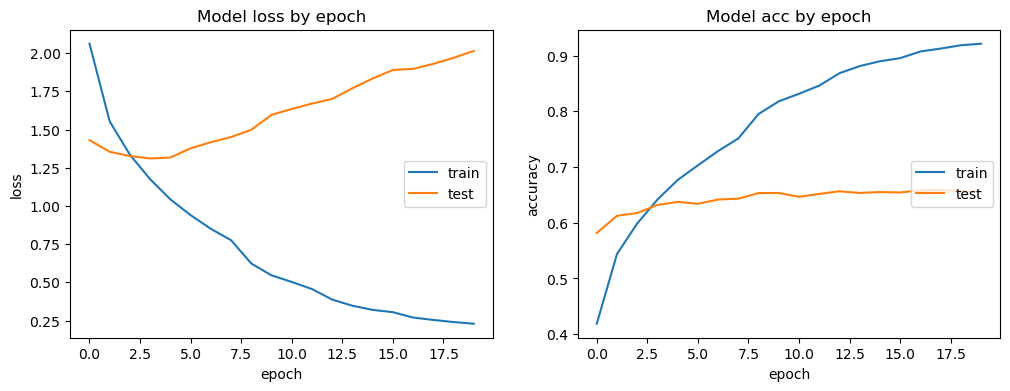

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [7]:
df_pred = EffB1.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.462279,2705,0.194222,2403,0.149278
1,40,40,0.517928,2905,0.093625,2462,0.087649
2,50,50,0.443452,1300,0.086310,60,0.056548
3,60,60,0.819277,2462,0.048193,50,0.042169
4,1140,1140,0.647940,1280,0.099251,1300,0.029963
5,1160,1160,0.945638,2403,0.011378,1280,0.006321
6,1180,1180,0.490196,1281,0.098039,1140,0.084967
7,1280,1280,0.420945,1300,0.169405,1281,0.072895
8,1281,1281,0.342995,1280,0.171498,2403,0.079710
9,1300,1300,0.824579,1280,0.061447,1302,0.017839


In [8]:
y_orig = EffB1.get_y_orig()
y_pred = EffB1.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 65.57348092322187 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.57      0.46      0.51       623
          40       0.68      0.52      0.59       502
          50       0.54      0.44      0.49       336
          60       0.72      0.82      0.76       166
        1140       0.67      0.65      0.66       534
        1160       0.93      0.95      0.94       791
        1180       0.60      0.49      0.54       153
        1280       0.50      0.42      0.46       974
        1281       0.38      0.34      0.36       414
        1300       0.69      0.82      0.75      1009
        1301       0.53      0.70      0.60       161
        1302       0.47      0.54      0.50       498
        1320       0.55      0.52      0.53       648
        1560       0.58      0.59      0.59      1015
        1920       0.81      0.79      0.80       861
        1940       0.69      0.7

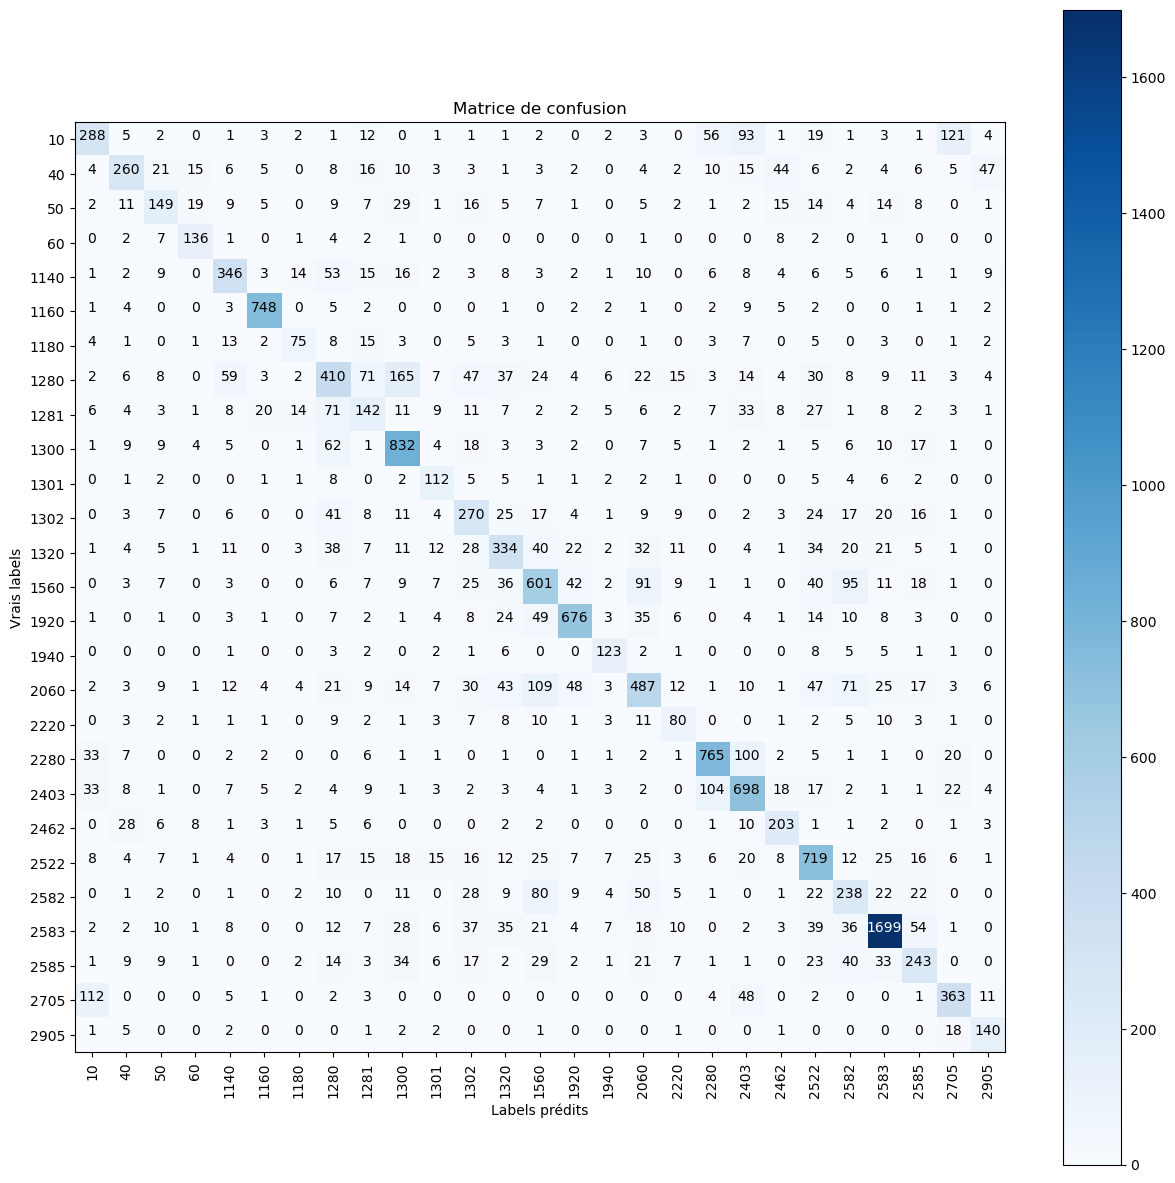

In [9]:
ds.show_confusion_matrix(y_orig, y_pred)

# VGG16

In [ ]:
vgg16 = cnn.DS_VGG16("Mon_Modele_VGG16")


In [ ]:
train_acc,val_acc,tloss,tvalloss = vgg16.fit_modele(40,True,15)

In [138]:
il y a  15 couches freezées sur  19
Epoch 1/40
2335/2335 [==============================] - 1258s 538ms/step - loss: 2.8407 - accuracy: 0.2160 - val_loss: 1.9785 - val_accuracy: 0.4409 - lr: 1.0000e-05
Epoch 2/40
2335/2335 [==============================] - 1303s 558ms/step - loss: 2.3045 - accuracy: 0.3451 - val_loss: 1.7976 - val_accuracy: 0.4784 - lr: 1.0000e-05
Epoch 3/40
2335/2335 [==============================] - 1260s 540ms/step - loss: 2.1181 - accuracy: 0.3925 - val_loss: 1.6879 - val_accuracy: 0.5062 - lr: 1.0000e-05
Epoch 4/40
2335/2335 [==============================] - 1259s 539ms/step - loss: 1.9868 - accuracy: 0.4266 - val_loss: 1.6286 - val_accuracy: 0.5255 - lr: 1.0000e-05
Epoch 5/40
2335/2335 [==============================] - 1257s 538ms/step - loss: 1.8950 - accuracy: 0.4504 - val_loss: 1.5524 - val_accuracy: 0.5447 - lr: 1.0000e-05
Epoch 6/40
2335/2335 [==============================] - 1256s 538ms/step - loss: 1.8235 - accuracy: 0.4680 - val_loss: 1.5303 - val_accuracy: 0.5520 - lr: 1.0000e-05
Epoch 7/40
2335/2335 [==============================] - 1259s 539ms/step - loss: 1.7565 - accuracy: 0.4871 - val_loss: 1.5054 - val_accuracy: 0.5595 - lr: 1.0000e-05
Epoch 8/40
2335/2335 [==============================] - 1256s 538ms/step - loss: 1.7009 - accuracy: 0.5024 - val_loss: 1.4914 - val_accuracy: 0.5656 - lr: 1.0000e-05
Epoch 9/40
2335/2335 [==============================] - 1255s 538ms/step - loss: 1.6469 - accuracy: 0.5156 - val_loss: 1.4596 - val_accuracy: 0.5737 - lr: 1.0000e-05
Epoch 10/40
2335/2335 [==============================] - 1259s 539ms/step - loss: 1.6039 - accuracy: 0.5264 - val_loss: 1.4321 - val_accuracy: 0.5791 - lr: 1.0000e-05
Epoch 11/40
2335/2335 [==============================] - 1255s 537ms/step - loss: 1.5552 - accuracy: 0.5398 - val_loss: 1.4149 - val_accuracy: 0.5858 - lr: 1.0000e-05
Epoch 12/40
2335/2335 [==============================] - 1255s 537ms/step - loss: 1.5208 - accuracy: 0.5472 - val_loss: 1.3873 - val_accuracy: 0.5916 - lr: 1.0000e-05
Epoch 13/40
2335/2335 [==============================] - 1259s 539ms/step - loss: 1.4858 - accuracy: 0.5544 - val_loss: 1.3835 - val_accuracy: 0.5936 - lr: 1.0000e-05
Epoch 14/40
2335/2335 [==============================] - 1255s 537ms/step - loss: 1.4429 - accuracy: 0.5698 - val_loss: 1.3537 - val_accuracy: 0.5976 - lr: 1.0000e-05
Epoch 15/40
2335/2335 [==============================] - 1255s 538ms/step - loss: 1.4167 - accuracy: 0.5757 - val_loss: 1.3666 - val_accuracy: 0.5937 - lr: 1.0000e-05
Epoch 16/40
2335/2335 [==============================] - 1258s 539ms/step - loss: 1.3790 - accuracy: 0.5846 - val_loss: 1.3593 - val_accuracy: 0.5997 - lr: 1.0000e-05
Epoch 17/40
2335/2335 [==============================] - 1254s 537ms/step - loss: 1.3496 - accuracy: 0.5928 - val_loss: 1.3287 - val_accuracy: 0.6071 - lr: 1.0000e-05
Epoch 18/40
2335/2335 [==============================] - 1257s 538ms/step - loss: 1.3246 - accuracy: 0.5994 - val_loss: 1.3199 - val_accuracy: 0.6082 - lr: 1.0000e-05
Epoch 19/40
2335/2335 [==============================] - 1257s 538ms/step - loss: 1.2917 - accuracy: 0.6074 - val_loss: 1.3297 - val_accuracy: 0.6061 - lr: 1.0000e-05
Epoch 20/40
2335/2335 [==============================] - 1254s 537ms/step - loss: 1.2654 - accuracy: 0.6169 - val_loss: 1.3170 - val_accuracy: 0.6112 - lr: 1.0000e-05
Epoch 21/40
2335/2335 [==============================] - 1256s 538ms/step - loss: 1.2420 - accuracy: 0.6212 - val_loss: 1.3142 - val_accuracy: 0.6092 - lr: 1.0000e-05
Epoch 22/40
2335/2335 [==============================] - 1257s 538ms/step - loss: 1.2239 - accuracy: 0.6258 - val_loss: 1.2955 - val_accuracy: 0.6145 - lr: 1.0000e-05
Epoch 23/40
2335/2335 [==============================] - 1254s 537ms/step - loss: 1.1955 - accuracy: 0.6329 - val_loss: 1.3125 - val_accuracy: 0.6140 - lr: 1.0000e-05
Epoch 24/40
2335/2335 [==============================] - 1254s 537ms/step - loss: 1.1746 - accuracy: 0.6406 - val_loss: 1.3066 - val_accuracy: 0.6179 - lr: 1.0000e-05
Epoch 25/40
2335/2335 [==============================] - 1254s 537ms/step - loss: 1.1515 - accuracy: 0.6457 - val_loss: 1.3160 - val_accuracy: 0.6181 - lr: 1.0000e-05
Epoch 26/40
2335/2335 [==============================] - ETA: 0s - loss: 1.1332 - accuracy: 0.6515
Epoch 26: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
2335/2335 [==============================] - 1254s 537ms/step - loss: 1.1332 - accuracy: 0.6515 - val_loss: 1.2961 - val_accuracy: 0.6189 - lr: 1.0000e-05
Epoch 27/40
2335/2335 [==============================] - 1256s 538ms/step - loss: 1.0842 - accuracy: 0.6646 - val_loss: 1.2773 - val_accuracy: 0.6216 - lr: 5.0000e-06
Epoch 28/40
2335/2335 [==============================] - 1299s 556ms/step - loss: 1.0720 - accuracy: 0.6684 - val_loss: 1.2851 - val_accuracy: 0.6229 - lr: 5.0000e-06
Epoch 29/40
2335/2335 [==============================] - 1253s 537ms/step - loss: 1.0547 - accuracy: 0.6733 - val_loss: 1.2842 - val_accuracy: 0.6219 - lr: 5.0000e-06
Epoch 30/40
2335/2335 [==============================] - 1274s 545ms/step - loss: 1.0400 - accuracy: 0.6778 - val_loss: 1.2965 - val_accuracy: 0.6216 - lr: 5.0000e-06
Epoch 31/40
2335/2335 [==============================] - ETA: 0s - loss: 1.0289 - accuracy: 0.6795
Epoch 31: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
2335/2335 [==============================] - 1280s 548ms/step - loss: 1.0289 - accuracy: 0.6795 - val_loss: 1.2809 - val_accuracy: 0.6263 - lr: 5.0000e-06
Epoch 32/40
2335/2335 [==============================] - 1272s 545ms/step - loss: 1.0057 - accuracy: 0.6862 - val_loss: 1.2733 - val_accuracy: 0.6262 - lr: 2.5000e-06
Epoch 33/40
2335/2335 [==============================] - 1265s 542ms/step - loss: 0.9942 - accuracy: 0.6876 - val_loss: 1.2826 - val_accuracy: 0.6274 - lr: 2.5000e-06
Epoch 34/40
2335/2335 [==============================] - 1262s 540ms/step - loss: 0.9869 - accuracy: 0.6908 - val_loss: 1.2745 - val_accuracy: 0.6275 - lr: 2.5000e-06
Epoch 35/40
2335/2335 [==============================] - 1257s 538ms/step - loss: 0.9841 - accuracy: 0.6912 - val_loss: 1.2802 - val_accuracy: 0.6295 - lr: 2.5000e-06
Epoch 36/40
2335/2335 [==============================] - 1258s 539ms/step - loss: 0.9806 - accuracy: 0.6924 - val_loss: 1.2690 - val_accuracy: 0.6287 - lr: 2.5000e-06
Epoch 37/40
2335/2335 [==============================] - 1257s 538ms/step - loss: 0.9740 - accuracy: 0.6946 - val_loss: 1.2818 - val_accuracy: 0.6282 - lr: 2.5000e-06
Epoch 38/40
2335/2335 [==============================] - 1254s 537ms/step - loss: 0.9702 - accuracy: 0.6966 - val_loss: 1.2725 - val_accuracy: 0.6291 - lr: 2.5000e-06
Epoch 39/40
2335/2335 [==============================] - 1256s 538ms/step - loss: 0.9651 - accuracy: 0.6975 - val_loss: 1.2816 - val_accuracy: 0.6296 - lr: 2.5000e-06
Epoch 40/40
2335/2335 [==============================] - ETA: 0s - loss: 0.9532 - accuracy: 0.6998
Epoch 40: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.
2335/2335 [==============================] - 1254s 537ms/step - loss: 0.9532 - accuracy: 0.6998 - val_loss: 1.2784 - val_accuracy: 0.6256 - lr: 2.5000e-06
531/531 [==============================] - 201s 378ms/step
 135/2335 [>.............................] - ETA: 6:16

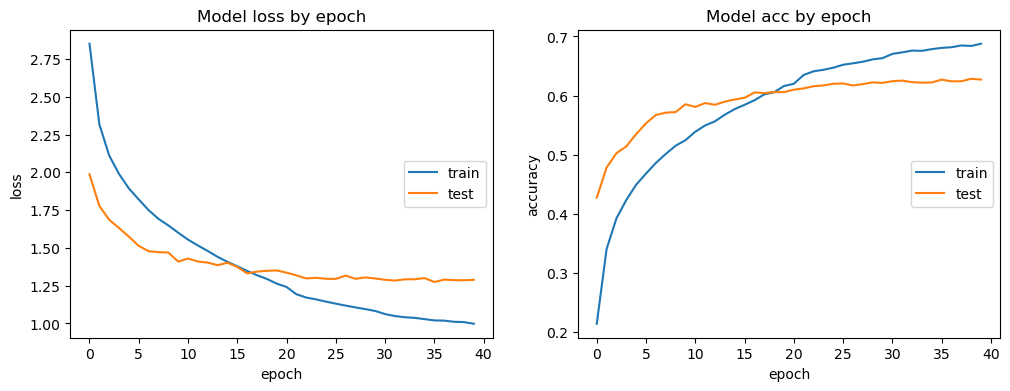

In [5]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [6]:
df_pred = vgg16.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.415730,2705,0.237560,2280,0.147673
1,40,40,0.521912,2905,0.083665,2462,0.071713
2,50,50,0.434524,1300,0.098214,60,0.095238
3,60,60,0.873494,50,0.030120,2462,0.024096
4,1140,1140,0.668539,1280,0.056180,1180,0.041199
5,1160,1160,0.931732,2403,0.017699,2462,0.010114
6,1180,1180,0.509804,1140,0.111111,1281,0.052288
7,1280,1280,0.379877,1300,0.183778,1140,0.099589
8,1281,1281,0.234300,1280,0.157005,2403,0.082126
9,1300,1300,0.792864,50,0.059465,1280,0.023786


In [7]:
y_orig = vgg16.get_y_orig()
y_pred = vgg16.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 62.71785209609044 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.56      0.42      0.48       623
          40       0.66      0.52      0.58       502
          50       0.34      0.43      0.38       336
          60       0.58      0.87      0.70       166
        1140       0.56      0.67      0.61       534
        1160       0.89      0.93      0.91       791
        1180       0.43      0.51      0.46       153
        1280       0.48      0.38      0.42       974
        1281       0.42      0.23      0.30       414
        1300       0.61      0.79      0.69      1009
        1301       0.52      0.64      0.57       161
        1302       0.43      0.36      0.39       498
        1320       0.50      0.42      0.46       648
        1560       0.60      0.56      0.58      1015
        1920       0.76      0.80      0.78       861
        1940       0.48      0.7

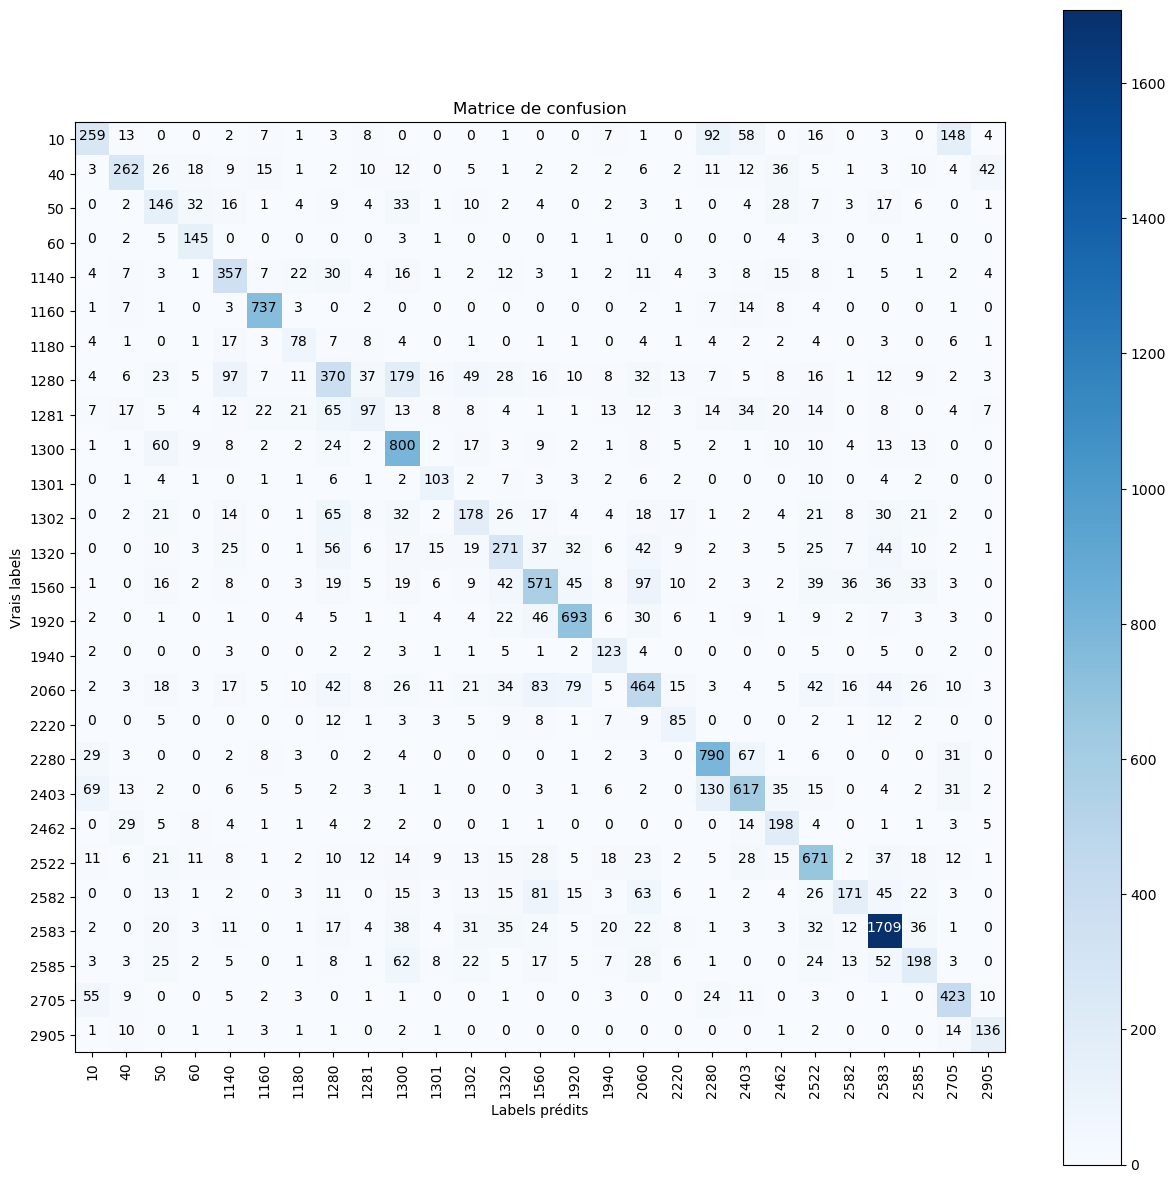

In [14]:
ds.show_confusion_matrix(y_orig, y_pred)

# INCEPTION

In [ ]:
incep = cnn.DS_INCEPTION("Mon_Modele_INCEPTION")

In [ ]:
train_acc,val_acc,tloss,tvalloss = incep.fit_modele(20,True,0,Train='Save')

In [ ]:
Epoch 1/20
4670/4670 [==============================] - 1666s 355ms/step - loss: 2.0142 - accuracy: 0.4214 - val_loss: 1.5039 - val_accuracy: 0.5608 - lr: 1.0000e-05
Epoch 2/20
4670/4670 [==============================] - 1630s 349ms/step - loss: 1.5295 - accuracy: 0.5474 - val_loss: 1.3956 - val_accuracy: 0.5952 - lr: 1.0000e-05
Epoch 3/20
4670/4670 [==============================] - 1608s 344ms/step - loss: 1.3210 - accuracy: 0.6045 - val_loss: 1.3555 - val_accuracy: 0.6148 - lr: 1.0000e-05
Epoch 4/20
4670/4670 [==============================] - 1610s 345ms/step - loss: 1.1657 - accuracy: 0.6464 - val_loss: 1.3368 - val_accuracy: 0.6212 - lr: 1.0000e-05
Epoch 5/20
4670/4670 [==============================] - 1612s 345ms/step - loss: 1.0443 - accuracy: 0.6793 - val_loss: 1.3296 - val_accuracy: 0.6350 - lr: 1.0000e-05
Epoch 6/20
4670/4670 [==============================] - 1613s 345ms/step - loss: 0.9338 - accuracy: 0.7079 - val_loss: 1.3833 - val_accuracy: 0.6341 - lr: 1.0000e-05
Epoch 7/20
4670/4670 [==============================] - 1640s 351ms/step - loss: 0.8392 - accuracy: 0.7348 - val_loss: 1.4339 - val_accuracy: 0.6309 - lr: 1.0000e-05
Epoch 8/20
4670/4670 [==============================] - 1628s 349ms/step - loss: 0.7592 - accuracy: 0.7592 - val_loss: 1.4497 - val_accuracy: 0.6388 - lr: 1.0000e-05
Epoch 9/20
4670/4670 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.7792
Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
4670/4670 [==============================] - 1606s 344ms/step - loss: 0.6849 - accuracy: 0.7792 - val_loss: 1.5348 - val_accuracy: 0.6335 - lr: 1.0000e-05
Epoch 10/20
4670/4670 [==============================] - 1605s 344ms/step - loss: 0.5585 - accuracy: 0.8178 - val_loss: 1.5227 - val_accuracy: 0.6427 - lr: 5.0000e-06
Epoch 11/20
4670/4670 [==============================] - 1606s 344ms/step - loss: 0.5033 - accuracy: 0.8355 - val_loss: 1.5881 - val_accuracy: 0.6428 - lr: 5.0000e-06
Epoch 12/20
4670/4670 [==============================] - 1606s 344ms/step - loss: 0.4615 - accuracy: 0.8466 - val_loss: 1.6402 - val_accuracy: 0.6385 - lr: 5.0000e-06
Epoch 13/20
4670/4670 [==============================] - ETA: 0s - loss: 0.4178 - accuracy: 0.8625
Epoch 13: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
4670/4670 [==============================] - 1606s 344ms/step - loss: 0.4178 - accuracy: 0.8625 - val_loss: 1.6961 - val_accuracy: 0.6400 - lr: 5.0000e-06
Epoch 14/20
4670/4670 [==============================] - 1606s 344ms/step - loss: 0.3608 - accuracy: 0.8810 - val_loss: 1.7566 - val_accuracy: 0.6429 - lr: 2.5000e-06
Epoch 15/20
4670/4670 [==============================] - 1605s 344ms/step - loss: 0.3349 - accuracy: 0.8872 - val_loss: 1.7795 - val_accuracy: 0.6401 - lr: 2.5000e-06
Epoch 16/20
4670/4670 [==============================] - 1626s 348ms/step - loss: 0.3187 - accuracy: 0.8929 - val_loss: 1.7968 - val_accuracy: 0.6415 - lr: 2.5000e-06
Epoch 17/20
4670/4670 [==============================] - ETA: 0s - loss: 0.2969 - accuracy: 0.8998
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.
4670/4670 [==============================] - 1671s 358ms/step - loss: 0.2969 - accuracy: 0.8998 - val_loss: 1.8533 - val_accuracy: 0.6401 - lr: 2.5000e-06
Epoch 18/20
4670/4670 [==============================] - 1643s 352ms/step - loss: 0.2709 - accuracy: 0.9097 - val_loss: 1.8623 - val_accuracy: 0.6414 - lr: 1.2500e-06
Epoch 19/20
4670/4670 [==============================] - 1639s 351ms/step - loss: 0.2568 - accuracy: 0.9145 - val_loss: 1.8925 - val_accuracy: 0.6412 - lr: 1.2500e-06
Epoch 20/20
4670/4670 [==============================] - 1662s 356ms/step - loss: 0.2490 - accuracy: 0.9165 - val_loss: 1.9151 - val_accuracy: 0.6384 - lr: 1.2500e-06
1062/1062 [==============================] - 88s 82ms/step
4670/4670 [==============================] - 407s 87ms/step
1062/1062 [==============================] - 80s 76ms/step

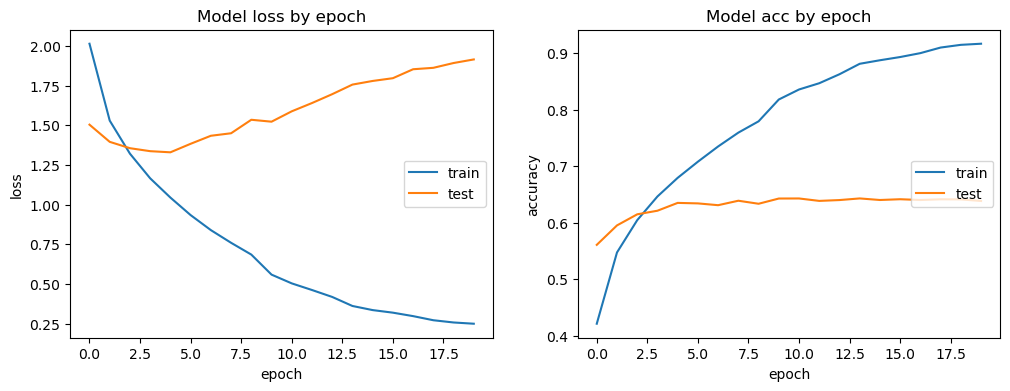

In [8]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [9]:
df_pred = incep.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.451043,2705,0.253612,2280,0.109149
1,40,40,0.440239,2905,0.155378,2462,0.077689
2,50,50,0.467262,1300,0.083333,1280,0.062500
3,60,60,0.777108,50,0.066265,2462,0.042169
4,1140,1140,0.602996,1280,0.119850,1180,0.059925
5,1160,1160,0.925411,2462,0.012642,2403,0.011378
6,1180,1180,0.490196,1140,0.091503,1281,0.065359
7,1280,1280,0.422998,1300,0.170431,1281,0.064682
8,1281,1281,0.272947,1280,0.195652,2403,0.062802
9,1300,1300,0.778989,1280,0.082260,2585,0.018831


In [10]:
#y_orig = ds.load_ndarray('Mon_Modele_Inception_y_orig') 
#y_pred = ds.load_ndarray('Mon_Modele_Inception_y_pred') 
y_orig = incep.get_y_orig()
y_pred = incep.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 63.842439943476215 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.51      0.45      0.48       623
          40       0.63      0.44      0.52       502
          50       0.47      0.47      0.47       336
          60       0.71      0.78      0.74       166
        1140       0.60      0.60      0.60       534
        1160       0.92      0.93      0.92       791
        1180       0.45      0.49      0.47       153
        1280       0.44      0.42      0.43       974
        1281       0.33      0.27      0.30       414
        1300       0.68      0.78      0.73      1009
        1301       0.61      0.66      0.64       161
        1302       0.49      0.52      0.50       498
        1320       0.53      0.48      0.50       648
        1560       0.60      0.60      0.60      1015
        1920       0.80      0.79      0.79       861
        1940       0.78      0.

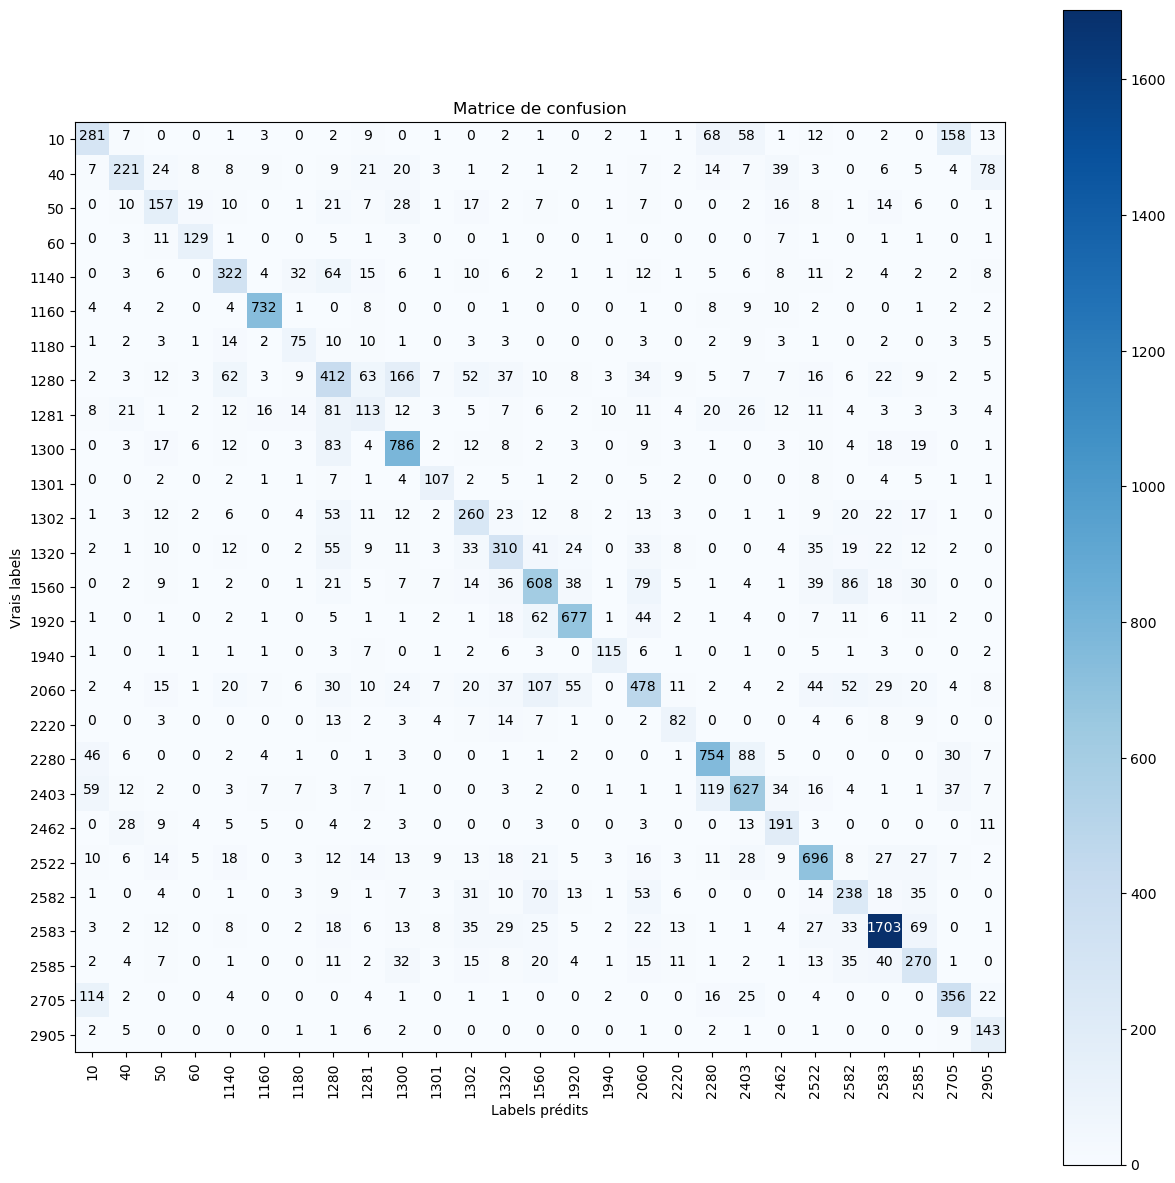

In [11]:
ds.show_confusion_matrix(y_orig, y_pred)

# RESNET50

In [ ]:
resnet=cnn.DS_RESNET50("RESNET50")

In [ ]:
train_acc,val_acc,tloss,tvalloss = resnet.fit_modele(20,True,0,Train='Save')

In [ ]:
il y a  176  couches sur ce modèle.
Sauvegarde de jeu pour la concatenation
Epoch 1/20
4670/4670 [==============================] - 1873s 400ms/step - loss: 2.2777 - accuracy: 0.3474 - val_loss: 1.5920 - val_accuracy: 0.5350 - lr: 1.0000e-05
Epoch 2/20
4670/4670 [==============================] - 1845s 395ms/step - loss: 1.6822 - accuracy: 0.5055 - val_loss: 1.4982 - val_accuracy: 0.5656 - lr: 1.0000e-05
Epoch 3/20
4670/4670 [==============================] - 1851s 396ms/step - loss: 1.4688 - accuracy: 0.5609 - val_loss: 1.3828 - val_accuracy: 0.5933 - lr: 1.0000e-05
Epoch 4/20
4670/4670 [==============================] - 1872s 401ms/step - loss: 1.3150 - accuracy: 0.6044 - val_loss: 1.4101 - val_accuracy: 0.6006 - lr: 1.0000e-05
Epoch 5/20
4670/4670 [==============================] - 1874s 401ms/step - loss: 1.1953 - accuracy: 0.6349 - val_loss: 1.3617 - val_accuracy: 0.6161 - lr: 1.0000e-05
Epoch 6/20
4670/4670 [==============================] - 1882s 403ms/step - loss: 1.0954 - accuracy: 0.6628 - val_loss: 1.3479 - val_accuracy: 0.6224 - lr: 1.0000e-05
Epoch 7/20
4670/4670 [==============================] - 1872s 401ms/step - loss: 1.0095 - accuracy: 0.6867 - val_loss: 1.4319 - val_accuracy: 0.6175 - lr: 1.0000e-05
Epoch 8/20
4670/4670 [==============================] - 1839s 394ms/step - loss: 0.9298 - accuracy: 0.7089 - val_loss: 1.4401 - val_accuracy: 0.6255 - lr: 1.0000e-05
Epoch 9/20
4670/4670 [==============================] - 1911s 409ms/step - loss: 0.8607 - accuracy: 0.7282 - val_loss: 1.4495 - val_accuracy: 0.6291 - lr: 1.0000e-05
Epoch 10/20
4670/4670 [==============================] - ETA: 0s - loss: 0.7904 - accuracy: 0.7488
Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
4670/4670 [==============================] - 1887s 404ms/step - loss: 0.7904 - accuracy: 0.7488 - val_loss: 1.5033 - val_accuracy: 0.6302 - lr: 1.0000e-05
Epoch 11/20
4670/4670 [==============================] - 1878s 402ms/step - loss: 0.6857 - accuracy: 0.7784 - val_loss: 1.4853 - val_accuracy: 0.6361 - lr: 5.0000e-06
Epoch 12/20
4670/4670 [==============================] - 1964s 420ms/step - loss: 0.6455 - accuracy: 0.7913 - val_loss: 1.5055 - val_accuracy: 0.6392 - lr: 5.0000e-06
Epoch 13/20
4670/4670 [==============================] - 1898s 406ms/step - loss: 0.5988 - accuracy: 0.8035 - val_loss: 1.5278 - val_accuracy: 0.6411 - lr: 5.0000e-06
Epoch 14/20
4670/4670 [==============================] - ETA: 0s - loss: 0.5705 - accuracy: 0.8132
Epoch 14: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
4670/4670 [==============================] - 1867s 400ms/step - loss: 0.5705 - accuracy: 0.8132 - val_loss: 1.5795 - val_accuracy: 0.6434 - lr: 5.0000e-06
Epoch 15/20
4670/4670 [==============================] - 1843s 395ms/step - loss: 0.5151 - accuracy: 0.8312 - val_loss: 1.6236 - val_accuracy: 0.6427 - lr: 2.5000e-06
Epoch 16/20
4670/4670 [==============================] - 1843s 395ms/step - loss: 0.4928 - accuracy: 0.8374 - val_loss: 1.6366 - val_accuracy: 0.6383 - lr: 2.5000e-06
Epoch 17/20
4670/4670 [==============================] - 1843s 395ms/step - loss: 0.4712 - accuracy: 0.8454 - val_loss: 1.6625 - val_accuracy: 0.6398 - lr: 2.5000e-06
Epoch 18/20
4670/4670 [==============================] - ETA: 0s - loss: 0.4574 - accuracy: 0.8494
Epoch 18: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.
4670/4670 [==============================] - 1843s 395ms/step - loss: 0.4574 - accuracy: 0.8494 - val_loss: 1.7031 - val_accuracy: 0.6398 - lr: 2.5000e-06
Epoch 19/20
4670/4670 [==============================] - 1843s 395ms/step - loss: 0.4292 - accuracy: 0.8573 - val_loss: 1.7151 - val_accuracy: 0.6378 - lr: 1.2500e-06
Epoch 20/20
4670/4670 [==============================] - 1895s 406ms/step - loss: 0.4147 - accuracy: 0.8617 - val_loss: 1.7321 - val_accuracy: 0.6360 - lr: 1.2500e-06
1062/1062 [==============================] - 128s 120ms/step
4670/4670 [==============================] - 532s 114ms/step
1062/1062 [==============================] - 116s 110ms/step

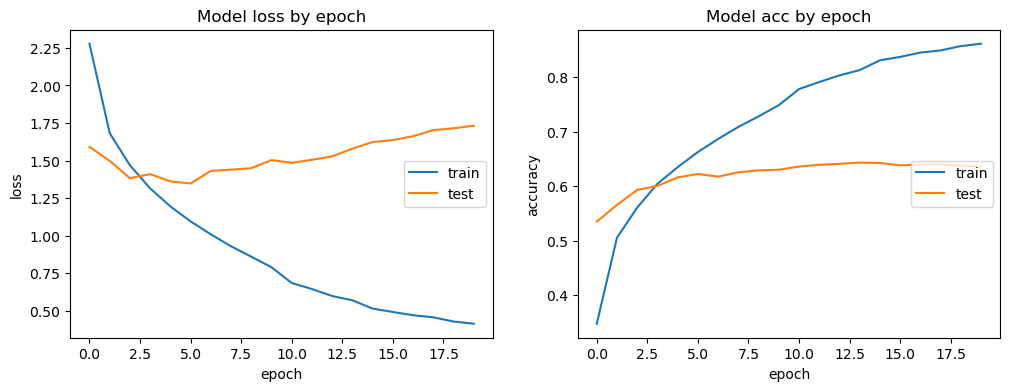

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [7]:
df_pred = resnet.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.375602,2705,0.239165,2280,0.152488
1,40,40,0.482072,2462,0.105578,2905,0.101594
2,50,50,0.482143,1300,0.110119,2462,0.056548
3,60,60,0.765060,50,0.072289,2462,0.048193
4,1140,1140,0.595506,1280,0.101124,1180,0.044944
5,1160,1160,0.935525,2462,0.011378,2403,0.008850
6,1180,1180,0.450980,1140,0.111111,1281,0.084967
7,1280,1280,0.391170,1300,0.170431,1281,0.081109
8,1281,1281,0.330918,1280,0.144928,2403,0.074879
9,1300,1300,0.795837,1280,0.068385,50,0.027750


In [8]:
y_orig = resnet.get_y_orig()
y_pred = resnet.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 63.601036269430054 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.70      0.38      0.49       623
          40       0.68      0.48      0.56       502
          50       0.39      0.48      0.43       336
          60       0.71      0.77      0.74       166
        1140       0.63      0.60      0.61       534
        1160       0.89      0.94      0.91       791
        1180       0.41      0.45      0.43       153
        1280       0.44      0.39      0.42       974
        1281       0.34      0.33      0.34       414
        1300       0.63      0.80      0.71      1009
        1301       0.55      0.65      0.59       161
        1302       0.39      0.44      0.41       498
        1320       0.51      0.45      0.48       648
        1560       0.60      0.60      0.60      1015
        1920       0.81      0.77      0.79       861
        1940       0.63      0.

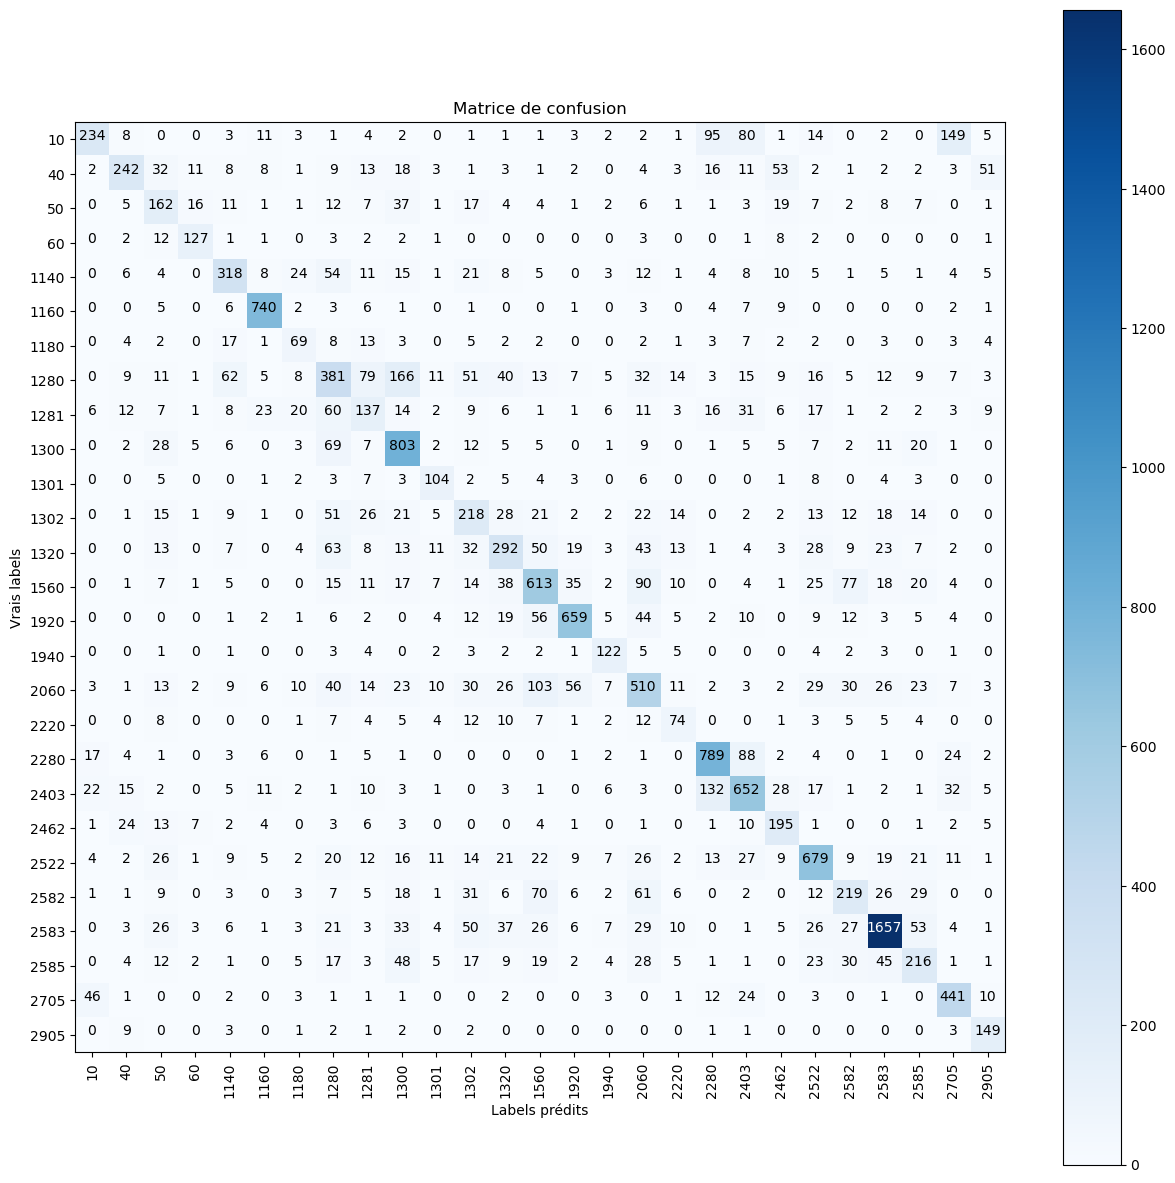

In [9]:
ds.show_confusion_matrix(y_orig, y_pred)

# VGG19

In [3]:
v19 = cnn.DS_VGG19("VGG19")

In [ ]:
train_acc,val_acc,tloss,tvalloss = v19.fit_modele(20,True,0,Train='Save')

In [ ]:
il y a  22  couches sur ce modèle.
Sauvegarde de jeu pour la concatenation
Epoch 1/20
4670/4670 [==============================] - 5033s 1s/step - loss: 2.8292 - accuracy: 0.1972 - val_loss: 2.0852 - val_accuracy: 0.3932 - lr: 1.0000e-05
Epoch 2/20
4670/4670 [==============================] - 4731s 1s/step - loss: 2.1071 - accuracy: 0.3884 - val_loss: 1.8102 - val_accuracy: 0.4681 - lr: 1.0000e-05
Epoch 3/20
4670/4670 [==============================] - 4764s 1s/step - loss: 1.8556 - accuracy: 0.4561 - val_loss: 1.6319 - val_accuracy: 0.5173 - lr: 1.0000e-05
Epoch 4/20
4670/4670 [==============================] - 4747s 1s/step - loss: 1.7030 - accuracy: 0.4969 - val_loss: 1.5747 - val_accuracy: 0.5332 - lr: 1.0000e-05
Epoch 5/20
4670/4670 [==============================] - 4778s 1s/step - loss: 1.5814 - accuracy: 0.5289 - val_loss: 1.5529 - val_accuracy: 0.5384 - lr: 1.0000e-05
Epoch 6/20
4670/4670 [==============================] - 4762s 1s/step - loss: 1.4868 - accuracy: 0.5558 - val_loss: 1.4738 - val_accuracy: 0.5647 - lr: 1.0000e-05
Epoch 7/20
4670/4670 [==============================] - 4746s 1s/step - loss: 1.4063 - accuracy: 0.5776 - val_loss: 1.4865 - val_accuracy: 0.5603 - lr: 1.0000e-05
Epoch 8/20
4670/4670 [==============================] - 4747s 1s/step - loss: 1.3337 - accuracy: 0.5953 - val_loss: 1.5007 - val_accuracy: 0.5586 - lr: 1.0000e-05
Epoch 9/20
4670/4670 [==============================] - 4721s 1s/step - loss: 1.2736 - accuracy: 0.6116 - val_loss: 1.4436 - val_accuracy: 0.5772 - lr: 1.0000e-05
Epoch 10/20
4670/4670 [==============================] - 4766s 1s/step - loss: 1.2139 - accuracy: 0.6272 - val_loss: 1.4330 - val_accuracy: 0.5736 - lr: 1.0000e-05
Epoch 11/20
4670/4670 [==============================] - 4686s 1s/step - loss: 1.1618 - accuracy: 0.6419 - val_loss: 1.4006 - val_accuracy: 0.5912 - lr: 1.0000e-05
Epoch 12/20
4670/4670 [==============================] - 4679s 1s/step - loss: 1.1164 - accuracy: 0.6562 - val_loss: 1.4020 - val_accuracy: 0.5936 - lr: 1.0000e-05
Epoch 13/20
4670/4670 [==============================] - 4679s 1s/step - loss: 1.0729 - accuracy: 0.6660 - val_loss: 1.4617 - val_accuracy: 0.5830 - lr: 1.0000e-05
Epoch 14/20
4670/4670 [==============================] - 4219s 903ms/step - loss: 1.0299 - accuracy: 0.6790 - val_loss: 1.3659 - val_accuracy: 0.6004 - lr: 1.0000e-05
Epoch 15/20
4670/4670 [==============================] - 4002s 857ms/step - loss: 0.9868 - accuracy: 0.6902 - val_loss: 1.4208 - val_accuracy: 0.5979 - lr: 1.0000e-05
Epoch 16/20
4670/4670 [==============================] - 4001s 857ms/step - loss: 0.9580 - accuracy: 0.6989 - val_loss: 1.4259 - val_accuracy: 0.6021 - lr: 1.0000e-05
Epoch 17/20
4670/4670 [==============================] - 4001s 857ms/step - loss: 0.9214 - accuracy: 0.7091 - val_loss: 1.4127 - val_accuracy: 0.6054 - lr: 1.0000e-05
Epoch 18/20
4670/4670 [==============================] - ETA: 0s - loss: 0.8904 - accuracy: 0.7165
Epoch 18: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
4670/4670 [==============================] - 4121s 882ms/step - loss: 0.8904 - accuracy: 0.7165 - val_loss: 1.4229 - val_accuracy: 0.6020 - lr: 1.0000e-05
Epoch 19/20
4670/4670 [==============================] - 4161s 891ms/step - loss: 0.7940 - accuracy: 0.7464 - val_loss: 1.3921 - val_accuracy: 0.6204 - lr: 5.0000e-06
Epoch 20/20
4670/4670 [==============================] - 4317s 924ms/step - loss: 0.7629 - accuracy: 0.7556 - val_loss: 1.4064 - val_accuracy: 0.6188 - lr: 5.0000e-06
1062/1062 [==============================] - 207s 195ms/step
4670/4670 [==============================] - 852s 182ms/step
1062/1062 [==============================] - 192s 181ms/step

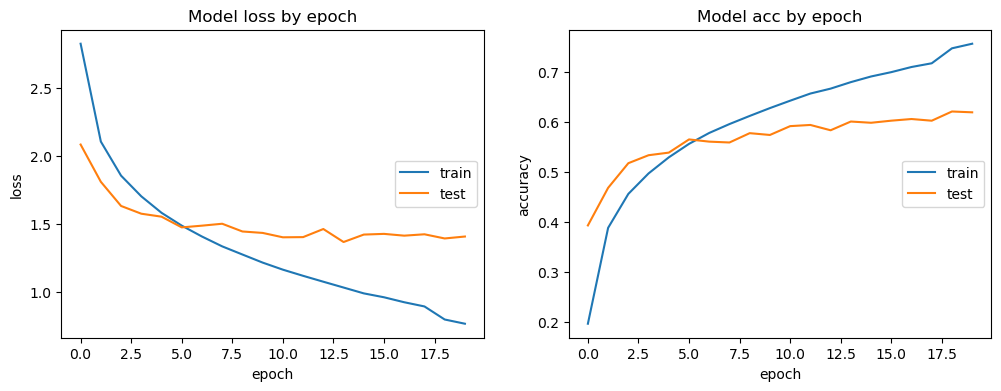

In [5]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [6]:
df_pred = v19.get_df_pred()
df_pred

,Unnamed: 0,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,0,10,10,0.515249,2705,0.187801,2280,0.101124
1,1,40,40,0.535857,2905,0.063745,2462,0.061753
2,2,50,50,0.559524,60,0.071429,1300,0.062500
3,3,60,60,0.837349,50,0.042169,40,0.036145
4,4,1140,1140,0.610487,1280,0.084270,1300,0.031835
5,5,1160,1160,0.941846,2403,0.010114,1281,0.010114
6,6,1180,1180,0.450980,1140,0.098039,1281,0.065359
7,7,1280,1280,0.371663,1300,0.168378,1140,0.084189
8,8,1281,1281,0.335749,1280,0.120773,2522,0.067633
9,9,1300,1300,0.766105,50,0.047572,1280,0.035679


In [7]:
y_orig = v19.get_y_orig()
y_pred = v19.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 61.87588318417334 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.47      0.52      0.49       623
          40       0.59      0.54      0.56       502
          50       0.35      0.56      0.43       336
          60       0.59      0.84      0.70       166
        1140       0.63      0.61      0.62       534
        1160       0.88      0.94      0.91       791
        1180       0.51      0.45      0.48       153
        1280       0.51      0.37      0.43       974
        1281       0.38      0.34      0.36       414
        1300       0.63      0.77      0.69      1009
        1301       0.62      0.58      0.60       161
        1302       0.35      0.46      0.40       498
        1320       0.50      0.42      0.46       648
        1560       0.61      0.51      0.55      1015
        1920       0.84      0.75      0.79       861
        1940       0.49      0.7

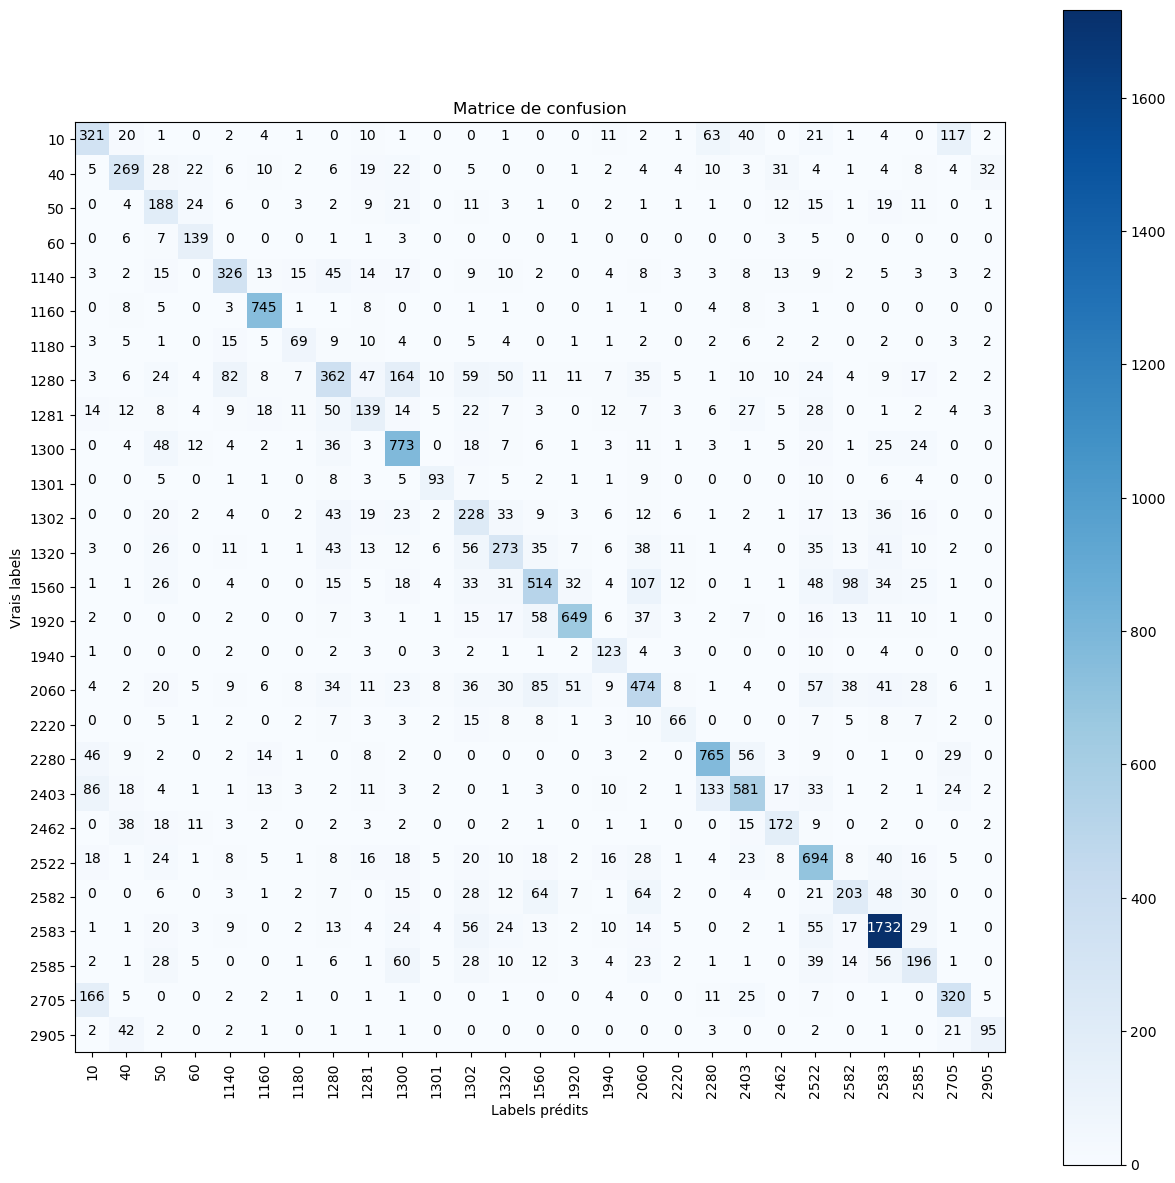

In [5]:
ds.show_confusion_matrix(y_orig, y_pred)

# Xception

In [3]:
Xcep = cnn.DS_Xception("Xception")

In [ ]:
train_acc,val_acc,tloss,tvalloss = Xcep.fit_modele(20,True,0,Train='Save')

In [ ]:
il y a  132  couches sur ce modèle.
Sauvegarde de jeu pour la concatenation
Epoch 1/20
4670/4670 [==============================] - 2176s 464ms/step - loss: 1.9120 - accuracy: 0.4514 - val_loss: 1.3875 - val_accuracy: 0.5868 - lr: 1.0000e-05
Epoch 2/20
4670/4670 [==============================] - 2165s 464ms/step - loss: 1.4355 - accuracy: 0.5769 - val_loss: 1.2625 - val_accuracy: 0.6225 - lr: 1.0000e-05
Epoch 3/20
4670/4670 [==============================] - 2165s 464ms/step - loss: 1.2328 - accuracy: 0.6294 - val_loss: 1.2389 - val_accuracy: 0.6334 - lr: 1.0000e-05
Epoch 4/20
4670/4670 [==============================] - 2166s 464ms/step - loss: 1.0857 - accuracy: 0.6679 - val_loss: 1.2262 - val_accuracy: 0.6428 - lr: 1.0000e-05
Epoch 5/20
4670/4670 [==============================] - 2164s 463ms/step - loss: 0.9653 - accuracy: 0.7029 - val_loss: 1.2044 - val_accuracy: 0.6495 - lr: 1.0000e-05
Epoch 6/20
4670/4670 [==============================] - 2171s 465ms/step - loss: 0.8656 - accuracy: 0.7315 - val_loss: 1.2143 - val_accuracy: 0.6543 - lr: 1.0000e-05
Epoch 7/20
4670/4670 [==============================] - 2173s 465ms/step - loss: 0.7770 - accuracy: 0.7577 - val_loss: 1.2507 - val_accuracy: 0.6513 - lr: 1.0000e-05
Epoch 8/20
4670/4670 [==============================] - 2178s 466ms/step - loss: 0.6972 - accuracy: 0.7795 - val_loss: 1.2736 - val_accuracy: 0.6576 - lr: 1.0000e-05
Epoch 9/20
4670/4670 [==============================] - ETA: 0s - loss: 0.6246 - accuracy: 0.7991
Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
4670/4670 [==============================] - 2179s 467ms/step - loss: 0.6246 - accuracy: 0.7991 - val_loss: 1.2928 - val_accuracy: 0.6559 - lr: 1.0000e-05
Epoch 10/20
4670/4670 [==============================] - 2182s 467ms/step - loss: 0.5286 - accuracy: 0.8302 - val_loss: 1.3129 - val_accuracy: 0.6648 - lr: 5.0000e-06
Epoch 11/20
4670/4670 [==============================] - 2188s 469ms/step - loss: 0.4809 - accuracy: 0.8452 - val_loss: 1.3528 - val_accuracy: 0.6627 - lr: 5.0000e-06
Epoch 12/20
4670/4670 [==============================] - 2176s 466ms/step - loss: 0.4463 - accuracy: 0.8560 - val_loss: 1.3862 - val_accuracy: 0.6623 - lr: 5.0000e-06
Epoch 13/20
4670/4670 [==============================] - ETA: 0s - loss: 0.4174 - accuracy: 0.8651
Epoch 13: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
4670/4670 [==============================] - 2176s 466ms/step - loss: 0.4174 - accuracy: 0.8651 - val_loss: 1.3981 - val_accuracy: 0.6635 - lr: 5.0000e-06
Epoch 14/20
4670/4670 [==============================] - 2178s 466ms/step - loss: 0.3671 - accuracy: 0.8808 - val_loss: 1.4251 - val_accuracy: 0.6686 - lr: 2.5000e-06
Epoch 15/20
4670/4670 [==============================] - 2178s 466ms/step - loss: 0.3489 - accuracy: 0.8870 - val_loss: 1.4348 - val_accuracy: 0.6656 - lr: 2.5000e-06
Epoch 16/20
4670/4670 [==============================] - 2174s 466ms/step - loss: 0.3284 - accuracy: 0.8930 - val_loss: 1.4609 - val_accuracy: 0.6657 - lr: 2.5000e-06
Epoch 17/20
4670/4670 [==============================] - ETA: 0s - loss: 0.3114 - accuracy: 0.8974
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.
4670/4670 [==============================] - 2177s 466ms/step - loss: 0.3114 - accuracy: 0.8974 - val_loss: 1.4741 - val_accuracy: 0.6645 - lr: 2.5000e-06
Epoch 18/20
4670/4670 [==============================] - 2173s 465ms/step - loss: 0.2971 - accuracy: 0.9031 - val_loss: 1.4850 - val_accuracy: 0.6667 - lr: 1.2500e-06
Epoch 19/20
4670/4670 [==============================] - 2176s 466ms/step - loss: 0.2837 - accuracy: 0.9068 - val_loss: 1.4940 - val_accuracy: 0.6667 - lr: 1.2500e-06
Epoch 20/20
4670/4670 [==============================] - 2173s 465ms/step - loss: 0.2789 - accuracy: 0.9085 - val_loss: 1.5066 - val_accuracy: 0.6706 - lr: 1.2500e-06
1062/1062 [==============================] - 116s 109ms/step
4670/4670 [==============================] - 497s 106ms/step
1062/1062 [==============================] - 113s 106ms/step

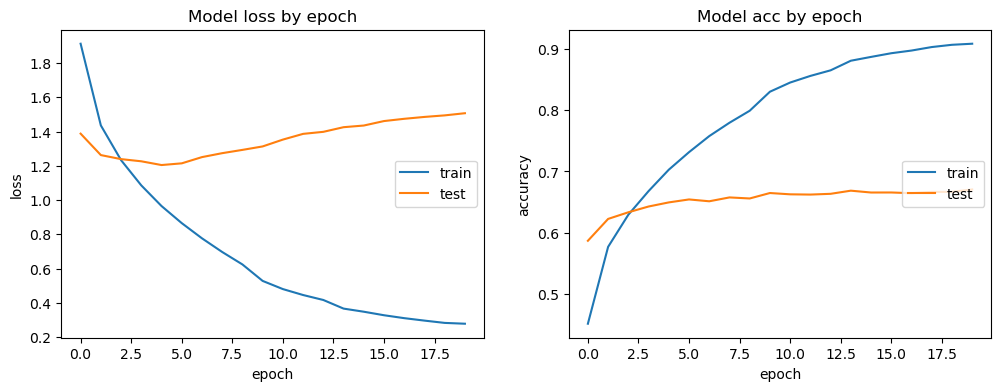

In [5]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [7]:
df_pred = Xcep.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.476726,2705,0.203852,2280,0.118780
1,40,40,0.529880,2905,0.099602,2462,0.089641
2,50,50,0.497024,1300,0.095238,2462,0.056548
3,60,60,0.855422,2462,0.060241,50,0.024096
4,1140,1140,0.674157,1280,0.073034,1180,0.039326
5,1160,1160,0.944374,2403,0.013906,2462,0.008850
6,1180,1180,0.477124,1281,0.091503,1140,0.065359
7,1280,1280,0.429158,1300,0.164271,1140,0.073922
8,1281,1281,0.364734,1280,0.149758,2403,0.079710
9,1300,1300,0.793855,1280,0.080278,2585,0.027750


In [8]:
y_orig = Xcep.get_y_orig()
y_pred = Xcep.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 67.0572303344324 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.54      0.48      0.51       623
          40       0.63      0.53      0.58       502
          50       0.57      0.50      0.53       336
          60       0.78      0.86      0.82       166
        1140       0.66      0.67      0.67       534
        1160       0.92      0.94      0.93       791
        1180       0.54      0.48      0.51       153
        1280       0.49      0.43      0.46       974
        1281       0.41      0.36      0.39       414
        1300       0.70      0.79      0.74      1009
        1301       0.64      0.70      0.67       161
        1302       0.53      0.50      0.51       498
        1320       0.56      0.54      0.55       648
        1560       0.64      0.61      0.62      1015
        1920       0.83      0.82      0.82       861
        1940       0.73      0.71

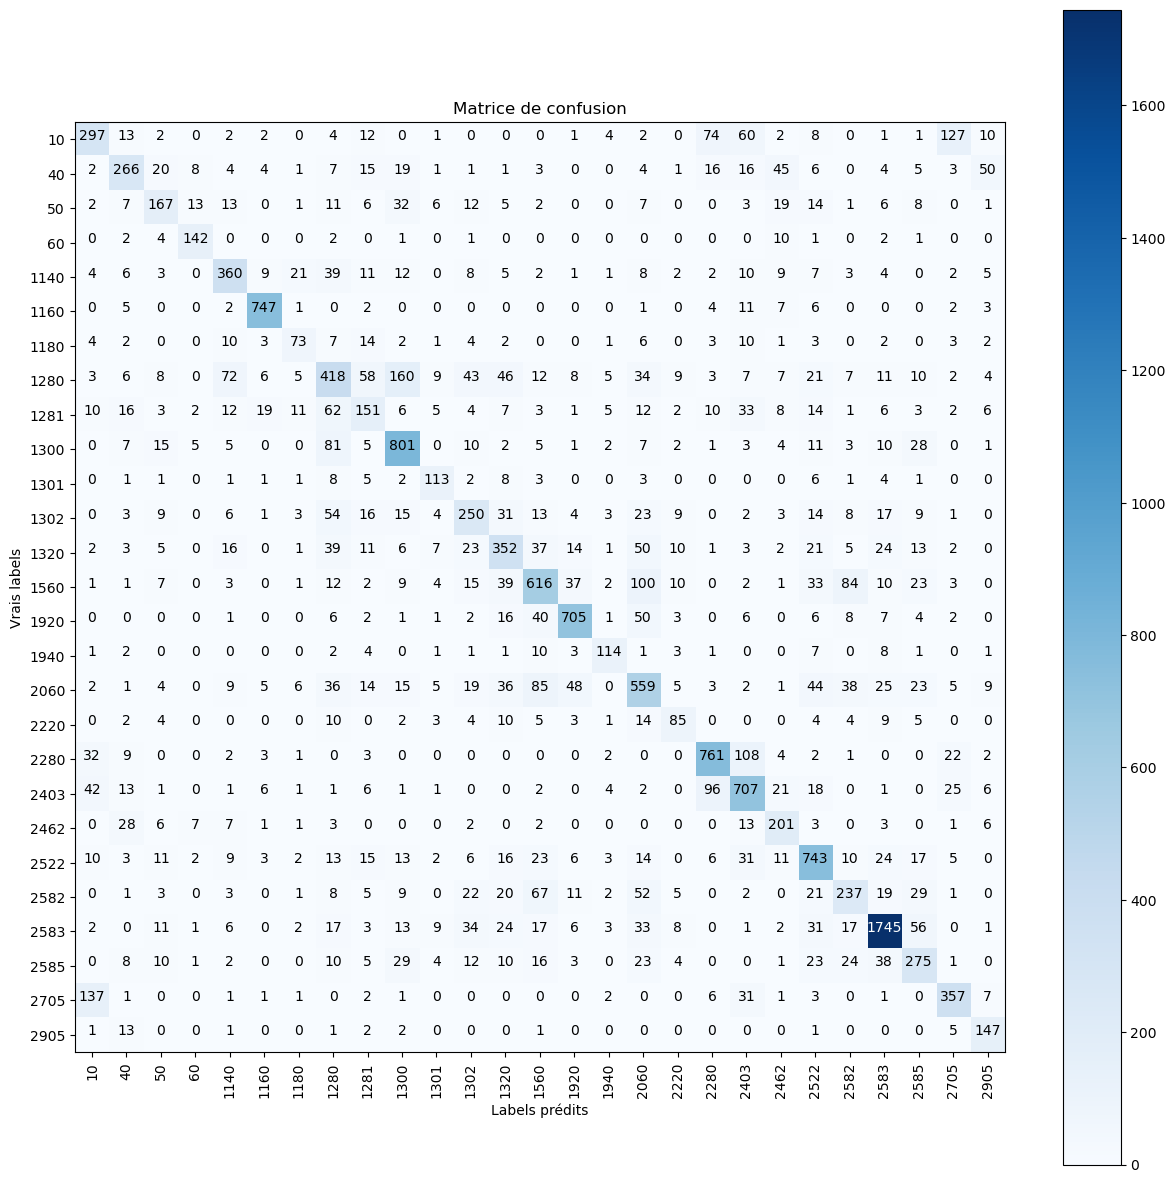

In [28]:
ds.show_confusion_matrix(y_orig, y_pred)